In [2]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split

from sklearn.metrics import classification_report, RocCurveDisplay, PrecisionRecallDisplay
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

from sklearn.preprocessing import StandardScaler

from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegressionCV, LogisticRegression

from sklearn.pipeline import make_pipeline

from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer

from sentence_transformers import SentenceTransformer

import matplotlib.pyplot as plt


c:\Users\dileo\AppData\Local\Programs\Python\Python313\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [15]:
df = pd.read_csv("data/best_picture_metadata_with_reviews_filtered.csv")

print(df)

train_df = df[df["Year Nominated"] < 2025]
test_df = df[df["Year Nominated"] == 2025]

X_train = train_df["Review Text"].fillna("")
y_train = train_df["Won"]
X_test = test_df["Review Text"].fillna("")
y_test = test_df["Won"]


                                          Film Name  Year Nominated  Won  \
0   Birdman or (The Unexpected Virtue of Ignorance)            2015    1   
1                                   American Sniper            2015    0   
2                                           Boyhood            2015    0   
3                          The Grand Budapest Hotel            2015    0   
4                                The Imitation Game            2015    0   
..                                              ...             ...  ...   
94                                     Emilia Pérez            2025    0   
95                                   I'm Still Here            2025    0   
96                                      Nickel Boys            2025    0   
97                                    The Substance            2025    0   
98                                           Wicked            2025    0   

                                          Description  \
0   A fading actor best known 

In [21]:
model = make_pipeline(
    CountVectorizer(lowercase=True,strip_accents="unicode",stop_words="english"),
    #TfidfTransformer(),
    LogisticRegressionCV() #remember this impooses ridge by default
    #implmement other categorical features through categorical encoder
)

              precision    recall  f1-score   support

           0       0.89      0.89      0.89         9
           1       0.00      0.00      0.00         1

    accuracy                           0.80        10
   macro avg       0.44      0.44      0.44        10
weighted avg       0.80      0.80      0.80        10




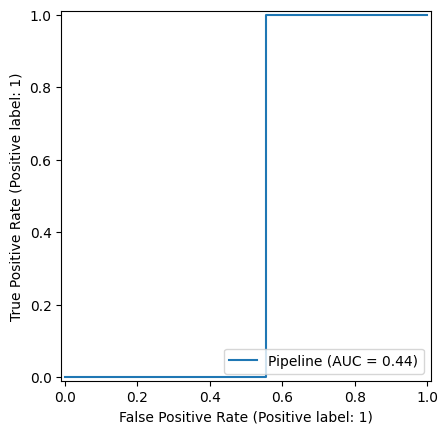

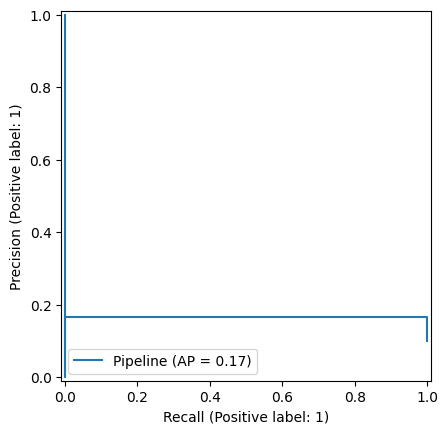

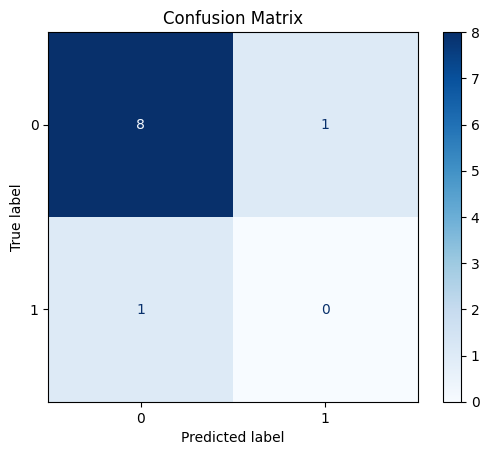

             Film Name  Won  Predicted Won  Predicted Probability
89               Anora    1              0               0.057561
90       The Brutalist    0              0               0.034291
91  A Complete Unknown    0              0               0.026596
92            Conclave    0              0               0.047515
93      Dune: Part Two    0              0               0.028631
94        Emilia Pérez    0              0               0.119972
95      I'm Still Here    0              1               0.858612
96         Nickel Boys    0              0               0.061972
97       The Substance    0              0               0.070677
98              Wicked    0              0               0.087911


In [22]:

model.fit(X_train, y_train)
y_test_pred = model.predict(X_test)

RocCurveDisplay.from_estimator(model, X_test, y=y_test)
PrecisionRecallDisplay.from_estimator(model, X_test, y=y_test)

print(classification_report(y_true=y_test, y_pred=y_test_pred))
print()

cm = confusion_matrix(y_test, y_test_pred)
ConfusionMatrixDisplay(confusion_matrix=cm).plot(cmap="Blues")
plt.title("Confusion Matrix")
plt.show()

test_df = test_df.copy()  # make a copy to avoid SettingWithCopyWarning
test_df["Predicted Won"] = y_test_pred

y_test_proba = model.predict_proba(X_test)[:, 1]


test_df = test_df.copy()
test_df["Predicted Won"] = y_test_pred
test_df["Predicted Probability"] = y_test_proba

# Print film name, true label, predicted label, and predicted probability
print(test_df[["Film Name", "Won", "Predicted Won", "Predicted Probability"]])
